In [1]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import json
import time
import re

In [9]:
df_channels = pd.read_csv("../data/channels.csv")
df_channels.index  = df_channels["channel_id"]
tmp = df_channels.drop("channel_id", axis=1).to_dict()
indexes = list(df_channels.index.values)
name_dict = tmp["name"]
cate_dict = tmp["category"]

In [10]:
df_final = None

for i in indexes:
    try:
        df = pd.read_csv("../data/subs/{0}.csv".format(i))
    except FileNotFoundError:
        continue
    df.upload_date = df.upload_date.apply(lambda x: time.mktime(datetime.strptime(str(x), '%Y%m%d').timetuple()))
    df["no_captions"] = df.captions.isnull()
    df["no_comments"] = df.comments.isnull()
    df["name"] = name_dict[i]
    df.drop("captions", axis=1, inplace=True)
    df.drop("comments", axis=1, inplace=True)
    if df_final is None:
        df_final = df
    else:
        df_final = pd.concat([df_final, df])

df_final

,category,channel_id,description,dislike_count,like_count,name,title,upload_date,video_id,view_count,no_captions,no_comments
0,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,You can find my more controversial posts on Pa...,33.0,2109.0,Coach Red Pill,🔴 If a Woman Cheats On You | Coach Red Pill,1.554001e+09,V9Rjlr1RCqM,17096.0,False,False
1,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,You can find my more controversial posts on Pa...,20.0,1082.0,Coach Red Pill,🔴 How to Handle School | Coach Red Pill,1.553915e+09,MkBRvetKkpc,13647.0,False,False
2,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Understanding what your negotiating partners w...,30.0,1147.0,Coach Red Pill,🔴 Negotiating Partners | Coach Red Pill,1.553742e+09,Aj30itYsapY,21005.0,False,False
3,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,You can find my more controversial posts on Pa...,59.0,2899.0,Coach Red Pill,🔴 Never Apologize For Speaking The Truth | Coa...,1.553396e+09,g7wDacbJ5IE,31151.0,False,False
4,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,And this video got demonetized too! lmao. YouT...,34.0,2364.0,Coach Red Pill,🔴 Picture The Man You Want To Be | Coach Red ...,1.553310e+09,YJ4vTACsk9Y,34235.0,False,False
5,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,This video was demonetized before I finished p...,77.0,4763.0,Coach Red Pill,🔴 Young Men Have Legitimate Grievances | Coac...,1.553137e+09,CR-1HiAsdjE,61160.0,False,False
6,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,I think it would sound great with a female cho...,89.0,803.0,Coach Red Pill,🔴 A Little Ditty | Coach Red Pill,1.553051e+09,iV7v5F5Z1k8,16024.0,False,False
7,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Join my livestreaming channel:\nhttps://www.yo...,272.0,3551.0,Coach Red Pill,🔴 The Cold Civil War is Ending | Coach Red Pill,1.552964e+09,3r2RZna05qM,65585.0,False,False
8,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,40.0,1727.0,Coach Red Pill,🔴 The Truth About Blended Families | Coach Re...,1.552792e+09,0UmTN1zb2Ak,34096.0,False,False
9,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,133.0,2524.0,Coach Red Pill,🔴 The Starter Girlfriend | Coach Red Pill,1.552619e+09,duqTvk4twhY,56093.0,False,False


In [5]:
df_final

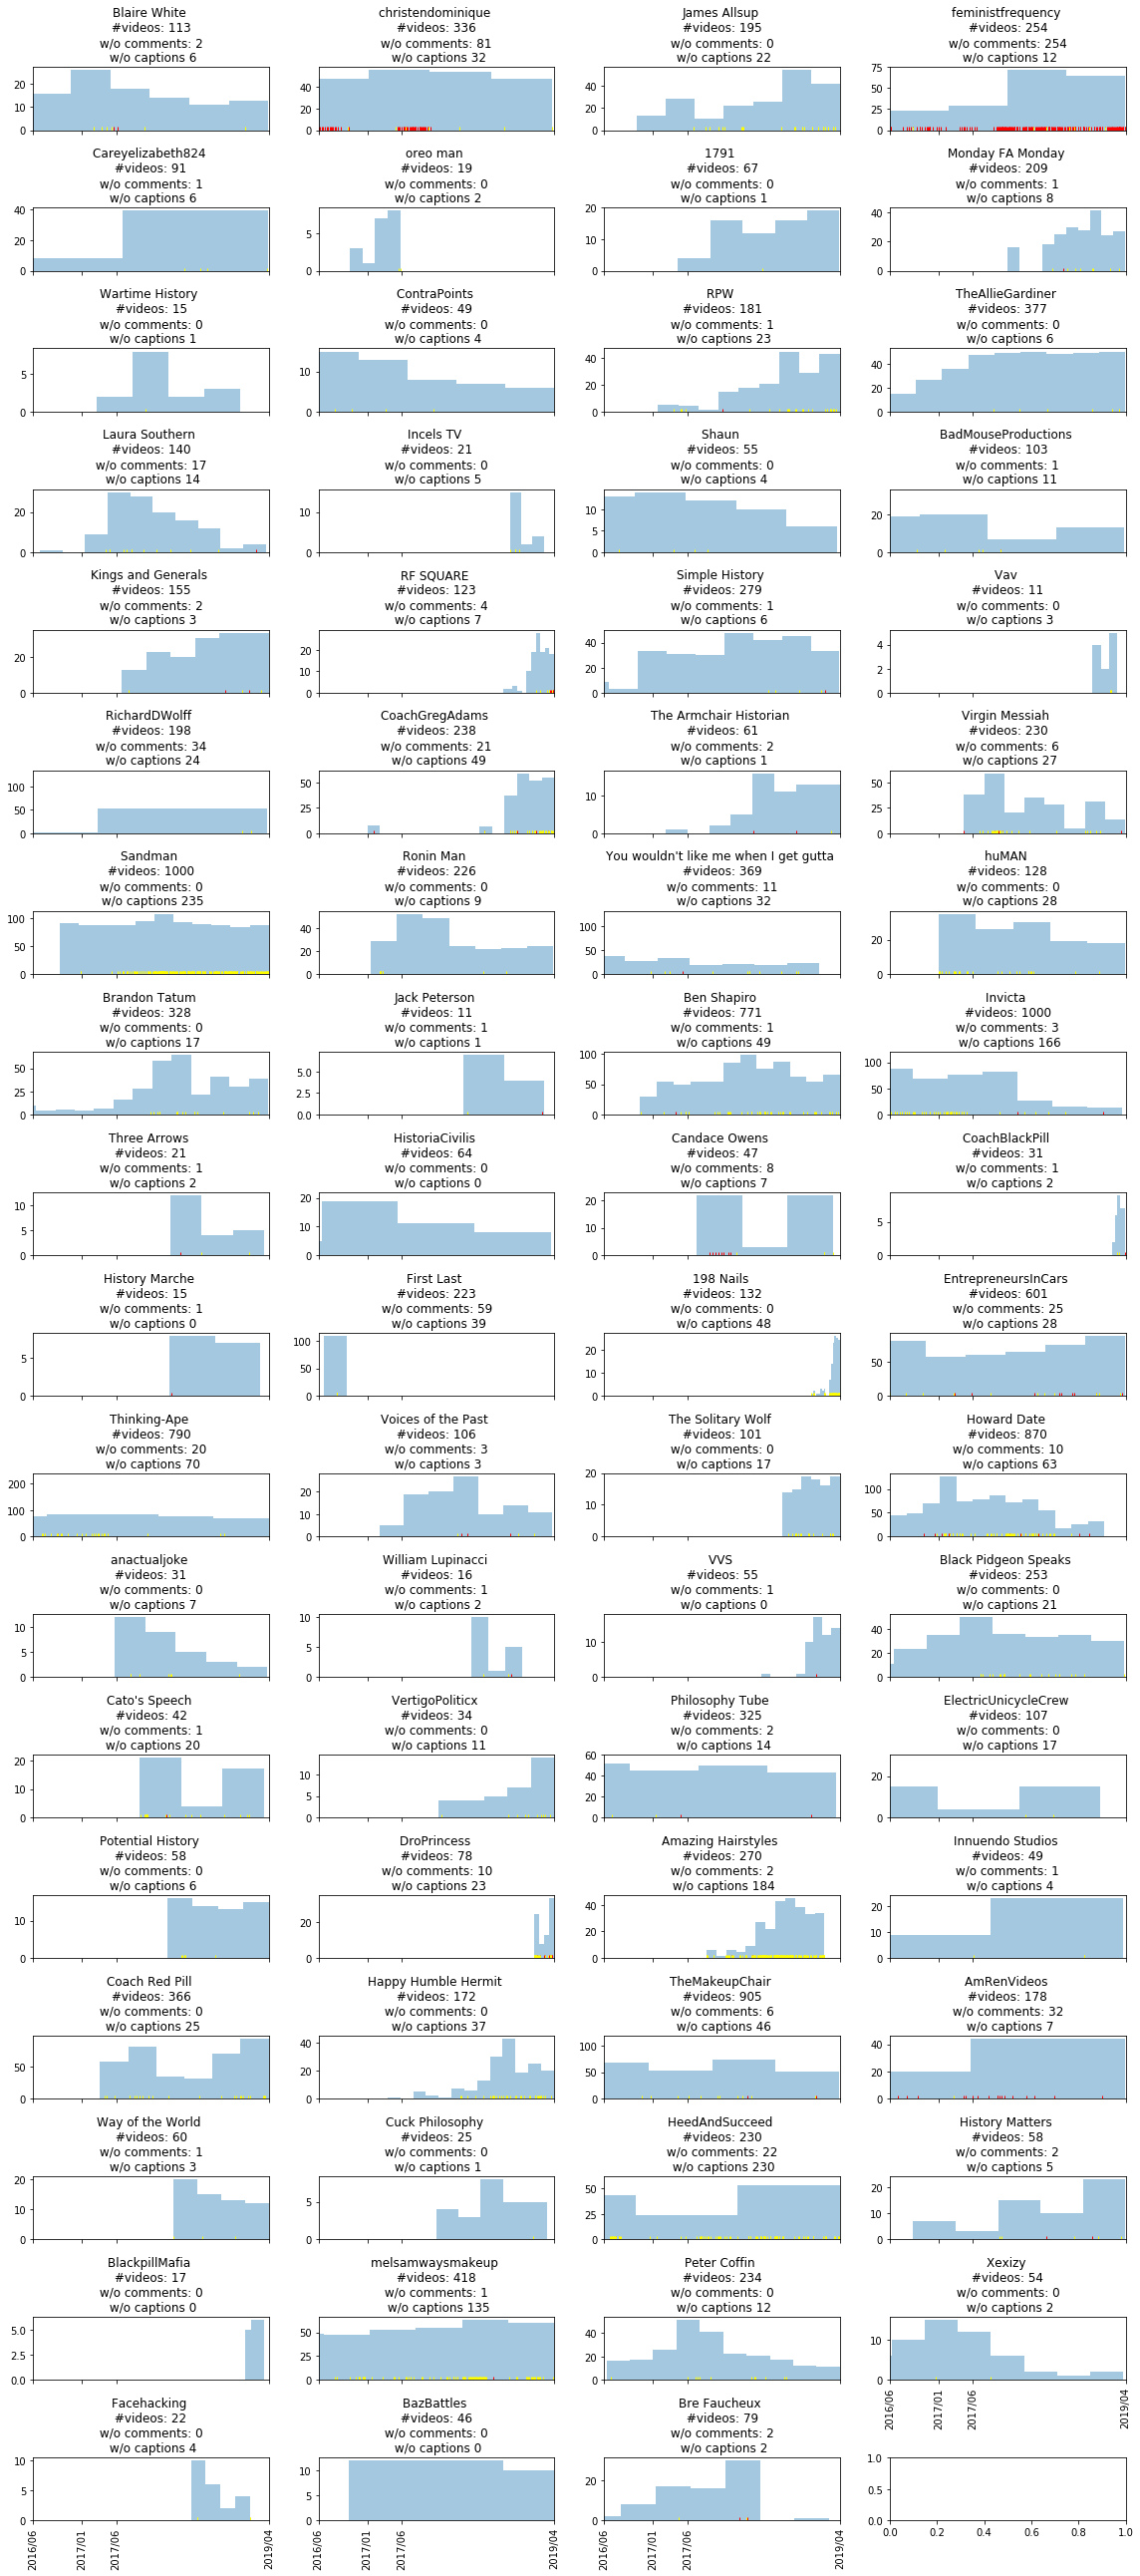

In [253]:
channels_present = list(set(list(df_final.channel_id.values)))
num_rows = int(np.ceil(len(channels_present) /4))

fig, axs = plt.subplots(num_rows,4,figsize=(16,2*num_rows))

axs = axs.flatten()
channels_present = list(set(list(df_final.channel_id.values)))

count = 0
for ax, channel in zip(axs, channels_present):
    count += 1
    sns.distplot(df_final[df_final.channel_id == channel].upload_date, ax=ax, kde=False)
    sns.rugplot(df_final[(df_final.channel_id == channel) & (df_final.no_comments)].upload_date, ax=ax, color="red")
    sns.rugplot(df_final[(df_final.channel_id == channel) & (df_final.no_captions)].upload_date, ax=ax, color="yellow")
    ax.set_xlim([1464750000.0, 1554087600.0])
    ax.set_title("{0} \n #videos: {1} \n w/o comments: {2} \n w/o captions {3}".format(
                    name_dict[channel], 
                    str(len(df_final[df_final.channel_id == channel])),
                    str(df_final[df_final.channel_id == channel].no_comments.sum()),
                    str(df_final[df_final.channel_id == channel].no_captions.sum())        
                    )
                )

    ax.set_xlabel("")
    ax.set_xticks([1464750000.0, 1483236000.0, 1496286000.0, 1554087600.0])

    if count <= len(channels_present) - 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticks([1464750000.0, 1483236000.0, 1496286000.0, 1554087600.0])
        ax.set_xticklabels(["2016/06", "2017/01", "2017/06","2019/04"], rotation=90)

# g = sns.FacetGrid(df_final, col='name', hue="no_comments", col_wrap=4)
# g = (g.map(sns.distplot, "upload_date", hist=True, kde=False))\
#     .set_titles("{col_name}")


plt.tight_layout()
# for ax in g.axes:
#     ax.set_xticks([1464750000.0, 1496286000.0, 1554087600.0])
#     ax.set_xticklabels(["2016/06", "2017/01", "2019/04"], rotation=90)
#     ax.set_xlim([1464750000.0, 1554087600.0])

    
# sns.distplot(df_final["upload_date"])

In [4]:
def count_ocurrence(text, string):
    if type(text) != str:
        print("ASd")
        return 0
    return len(re.findall(string, text))

def count_polarity(text):
    blob = TextBlob(text)
    acc = []
    for sentence in blob.sentences:
        acc.append(sentence.sentiment.polarity)
    
    return np.array(acc).mean()

df

,captions,category,channel_id,description,dislike_count,like_count,name,title,upload_date,video_id,view_count
0,so what do you think of my new look [Music] n...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Understanding what your negotiating partners w...,24,907,Coach Red Pill,🔴 Negotiating Partners | Coach Red Pill,20190328,Aj30itYsapY,15081
1,you know the other day I did a video about men...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,You can find my more controversial posts on Pa...,57,2838,Coach Red Pill,🔴 Never Apologize For Speaking The Truth | Coa...,20190324,g7wDacbJ5IE,29792
2,before I get started with today's video I just...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,And this video got demonetized too! lmao. YouT...,33,2274,Coach Red Pill,🔴 Picture The Man You Want To Be | Coach Red ...,20190323,YJ4vTACsk9Y,32521
3,it troubles me greatly when I see young men wa...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,This video was demonetized before I finished p...,71,4516,Coach Red Pill,🔴 Young Men Have Legitimate Grievances | Coac...,20190321,CR-1HiAsdjE,57125
4,hi there well see you know you gotta take ris...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,I think it would sound great with a female cho...,88,788,Coach Red Pill,🔴 A Little Ditty | Coach Red Pill,20190320,iV7v5F5Z1k8,15689
5,this video is sort of like a reaction to the s...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Join my livestreaming channel:\nhttps://www.yo...,262,3439,Coach Red Pill,🔴 The Cold Civil War is Ending | Coach Red Pill,20190319,3r2RZna05qM,62747
6,when I was growing up you know a lot of parent...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,40,1704,Coach Red Pill,🔴 The Truth About Blended Families | Coach Re...,20190317,0UmTN1zb2Ak,33419
7,that motorcycle that you're seeing on screen r...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,Please help me publish my novel:\nhttps://www....,126,2464,Coach Red Pill,🔴 The Starter Girlfriend | Coach Red Pill,20190315,duqTvk4twhY,54470
11,hi there before it gets started with today's v...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,I'm publishing a novel—check it out here:\nhtt...,51,2582,Coach Red Pill,🔴 Discipline,20190309,-JQy5_3T3uI,43019
12,[Music] so recently something happened that wa...,Manosphere,UC5tEELgWBfKbA9fVPRzBzPQ,https://www.indiegogo.com/projects/wilshire-bo...,116,2550,Coach Red Pill,🔴 You Cannot Make Friends With SJW's,20190307,X9pKH2Jf5r0,48179


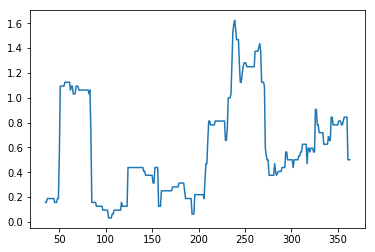

In [10]:

for i in [32]:
    tmp = df.captions.apply(lambda x: count_ocurrence(text=x, string='sjw')).rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)

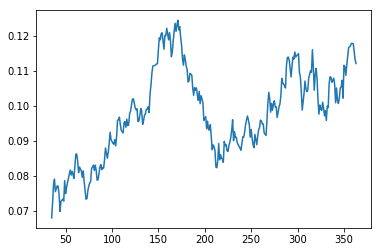

In [8]:
for i in [32]:
    tmp = df.captions.apply(count_polarity).rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)

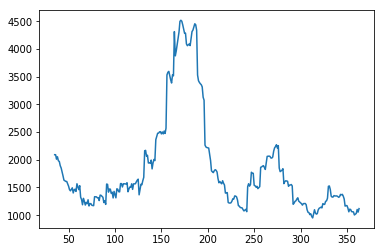

In [11]:
for i in [32]:
    tmp = df.like_count.rolling(window=i).mean()
    tmp = tmp[~tmp.isnull()]
    plt.plot(tmp)